In [5]:
pip install tensorflow

In [16]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [17]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

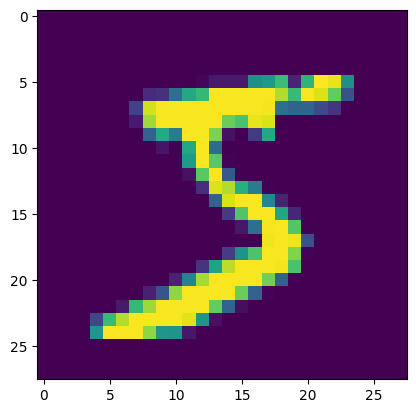

In [18]:
plt.imshow(x_train[0])

In [19]:
x_train[0].shape

(28, 28)

In [20]:
x_train=x_train.reshape(-1,28,28,1).astype("float32")/255.0
x_test=x_test.reshape(-1,28,28,1).astype("float32")/255.0

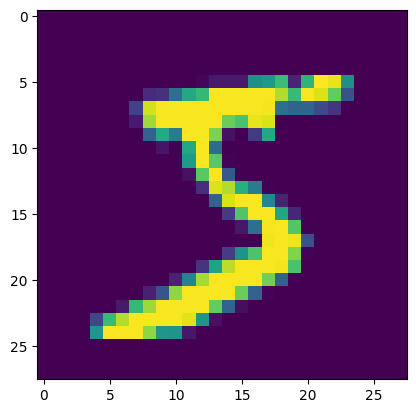

In [21]:
plt.imshow(x_train[0])

In [22]:
x_train[0].shape

(28, 28, 1)

In [25]:
x_train=tf.convert_to_tensor(x_train)
x_test=tf.convert_to_tensor(x_test)

In [26]:
x_train=tf.image.grayscale_to_rgb(x_train)
x_test=tf.image.grayscale_to_rgb(x_test)

In [29]:
x_train[0].shape

TensorShape([28, 28, 3])

In [30]:
x_train=tf.image.resize(x_train,(40,40))
x_test=tf.image.resize(x_test,(40,40))

In [33]:
import tensorflow
from tensorflow.keras.utils import to_categorical

In [35]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

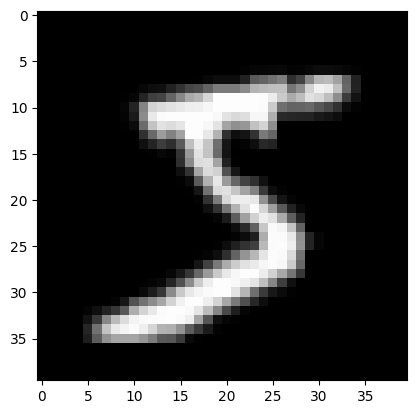

In [37]:
plt.imshow(x_train[0])

In [38]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications import VGG16

In [40]:
model=VGG16(weights="imagenet",include_top=False,input_shape=(40,40,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [42]:
for layer in model.layers:
  layer.trainable=False

In [43]:
print(model.input)

<KerasTensor shape=(None, 40, 40, 3), dtype=float32, sparse=False, name=keras_tensor>


In [44]:
print(model.output)

<KerasTensor shape=(None, 1, 1, 512), dtype=float32, sparse=False, name=keras_tensor_18>


In [45]:
x=Flatten() (model.output)
x=Dense(126,activation="relu")(x)
x=Dropout(0.5)(x)
x=Dense(10,activation="softmax")(x)

In [46]:
x

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_22>

In [49]:
final_model=Model(inputs=model.input,outputs=x)

In [50]:
final_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [51]:
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 40, 40, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 40, 40, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 40, 40, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 20, 20, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 10, 10, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 10, 10, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 126)                 │          64,638 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,780,596 (56.38 MB)

 Trainable params: 65,908 (257.45 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
ans=final_model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 969s 646ms/step - accuracy: 0.7176 - loss: 0.9079 - val_accuracy: 0.9413 - val_loss: 0.2071
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 969s 646ms/step - accuracy: 0.9169 - loss: 0.2821 - val_accuracy: 0.9567 - val_loss: 0.1548
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 966s 635ms/step - accuracy: 0.9383 - loss: 0.2087 - val_accuracy: 0.9582 - val_loss: 0.1358
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 997s 645ms/step - accuracy: 0.9446 - loss: 0.1810 - val_accuracy: 0.9672 - val_loss: 0.1087
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 968s 636ms/step - accuracy: 0.9520 - loss: 0.1647 - val_accuracy: 0.9663 - val_loss: 0.1028


In [55]:
loss,accuracy=final_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 508ms/step - accuracy: 0.9653 - loss: 0.1105


In [57]:
print("LOSS:",loss*100)
print("ACCURACY",accuracy*100)

LOSS: 10.13488844037056
ACCURACY 96.82000279426575
